In [84]:
import pandas as pd
import geopandas as gpd
import os
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import folium

In [85]:
fp = os.path.join('inrix_grouped.pkl')
df = pd.read_pickle(fp)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79190 entries, 0 to 79189
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   geometry                 79190 non-null  geometry
 1   XDSegID                  79190 non-null  float64 
 2   PreviousXD               56315 non-null  float64 
 3   NextXDSegI               56314 non-null  float64 
 4   FRC                      79190 non-null  int64   
 5   County_inrix             79190 non-null  object  
 6   Miles                    79190 non-null  float64 
 7   Lanes                    79190 non-null  float64 
 8   SlipRoad                 79190 non-null  bool    
 9   StartLat                 79190 non-null  float64 
 10  StartLong                79190 non-null  float64 
 11  EndLat                   79190 non-null  float64 
 12  EndLong                  79190 non-null  float64 
 13  Bearing                  79190 non-null  object  
 14  XDGrou

In [45]:
df.columns

Index(['geometry', 'XDSegID', 'PreviousXD', 'NextXDSegI', 'FRC',
       'County_inrix', 'Miles', 'Lanes', 'SlipRoad', 'StartLat', 'StartLong',
       'EndLat', 'EndLong', 'Bearing', 'XDGroup', 'RoadNumber', 'RoadName',
       'RoadList', 'OSMWayIDs', 'OSMWayDirections', 'WayStartOffset_m',
       'WayEndOffset_m', 'WayStartOffset_percent', 'WayEndOffset_percent',
       'iSF_length', 'iSF_length_min', 'Nearest_Weather_Station',
       'MyGrouping_3', 'MyGrouping_3_id', 'MyGrouping_3_id_miles'],
      dtype='object')

In [46]:
df.loc[df['PreviousXD'].notna()]['PreviousXD'].astype('int64')

3         137561164
12       1363617698
31       1363503129
36        449193042
37        429150962
            ...    
79184    1524646925
79186    1524646946
79187    1524646945
79188     429350938
79189    1524645328
Name: PreviousXD, Length: 56315, dtype: int64

In [47]:
df['XDSegID'] = df['XDSegID'].astype('object')
df['PreviousXD'] = df['PreviousXD'].astype('object')
df['NextXDSegI'] = df['NextXDSegI'].astype('object')
df[['XDSegID', 'PreviousXD', 'NextXDSegI', 'Bearing', 'RoadNumber']]

,XDSegID,PreviousXD,NextXDSegI,Bearing,RoadNumber
0,136894517.0,NaN,NaN,E,140
1,136894316.0,NaN,NaN,N,16
2,136898736.0,NaN,NaN,N,None
3,136898876.0,137561164.0,NaN,E,None
4,136930189.0,NaN,NaN,W,None
...,...,...,...,...,...
79185,1524646933.0,NaN,NaN,E,None
79186,1524646945.0,1524646946.0,1524646944.0,E,79
79187,1524646944.0,1524646945.0,160012283.0,N,79
79188,1524646943.0,429350938.0,1524551088.0,N,412


In [49]:
df.loc[df['XDSegID'] == 136894517]

,geometry,XDSegID,PreviousXD,NextXDSegI,FRC,County_inrix,Miles,Lanes,SlipRoad,StartLat,...,WayStartOffset_m,WayEndOffset_m,WayStartOffset_percent,WayEndOffset_percent,iSF_length,iSF_length_min,Nearest_Weather_Station,MyGrouping_3,MyGrouping_3_id,MyGrouping_3_id_miles
0,"LINESTRING (-84.081 35.865, -84.081 35.865)",136894517.0,NaN,NaN,0,knox,0.017473,2.0,False,35.86516,...,686.413,704.473,40.749,41.821,1.0,1.0,723260-13891,8211514,NaN,NaN


In [61]:
bbox = Polygon([[-86.79651439189911, 36.155886375528965],
                [-86.79439544677734, 36.155886375528965],
                [-86.79439544677734, 36.15652307558645],
                [-86.79651439189911, 36.15652307558645],
                [-86.79651439189911, 36.155886375528965]])

<AxesSubplot:>

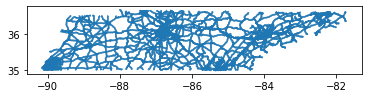

In [57]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.plot()

In [79]:
gdf[gdf['geometry'].intersects(bbox)][['XDSegID', 'PreviousXD', 'NextXDSegI', 'Bearing', 'Miles', 'Lanes']]

,XDSegID,PreviousXD,NextXDSegI,Bearing,Miles,Lanes
7377,156326265.0,NaN,NaN,S,0.039059,1.0
8269,156584976.0,NaN,NaN,S,0.037562,1.0
11368,160218245.0,NaN,NaN,N,0.081642,1.0
12298,160448968.0,NaN,NaN,N,0.037562,1.0
13160,160698956.0,NaN,NaN,N,0.039059,1.0
38764,449629874.0,449629873.0,449629875.0,E,0.210813,1.0
38765,449629871.0,449629870.0,449629872.0,W,0.210813,1.0


In [113]:
g1 = gdf.loc[gdf['XDSegID'] == 449629874.0]['geometry'].values[0]
g2 = gdf.loc[gdf['XDSegID'] == 449629871.0]['geometry'].values[0]
print(g1)
print(g2)

LINESTRING (-86.79591018537067 36.15583989547723, -86.79585976508471 36.15585994900005, -86.79563974929138 36.15596995689672, -86.79549020730684 36.15603985774773, -86.79532977912422 36.15612007183905, -86.79519971770472 36.15618023240754, -86.79457977737039 36.15647988933438, -86.79452018975969 36.15651025609753, -86.7941300055012 36.15669990512772, -86.79377992828839 36.15687007359287, -86.79366992039172 36.15691992092105, -86.79351006516687 36.15700013501237, -86.79338974402989 36.15704998234055, -86.79287007130972 36.15731010517953, -86.79274000989022 36.15737026574802, -86.79267010903921 36.15740005955337)
LINESTRING (-86.79267010903921 36.15740005955337, -86.79274000989022 36.15737026574802, -86.79287007130972 36.15731010517953, -86.79338974402989 36.15704998234055, -86.79351006516687 36.15700013501237, -86.79366992039172 36.15691992092105, -86.79377992828839 36.15687007359287, -86.7941300055012 36.15669990512772, -86.79452018975969 36.15651025609753, -86.79457977737039 36.156479

<AxesSubplot:>

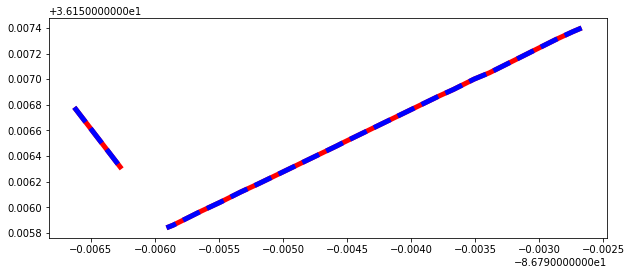

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.loc[gdf['XDSegID'] == 449629874.0].plot(ax=ax, color='red', lw=5, ls='-')
gdf.loc[gdf['XDSegID'] == 449629871.0].plot(ax=ax, color='blue', lw=5, ls='--')
gdf.loc[gdf['XDSegID'] == 160698956.0].plot(ax=ax, color='red', lw=5, ls='-')
gdf.loc[gdf['XDSegID'] == 156326265.0].plot(ax=ax, color='blue', lw=5, ls='--')

In [106]:
roads1 = [449629874.0, 160698956.0]
tgdf1 = gdf.loc[[x in roads1 for x in gdf['XDSegID']]]
roads2 = [449629871.0, 156326265.0]
tgdf2 = gdf.loc[[x in roads2 for x in gdf['XDSegID']]]

pt_centroid = bbox.centroid
m = folium.Map(location=[pt_centroid.y, pt_centroid.x],tiles='cartodbpositron',zoom_start=19, width='50%', height='50%')
for i, (k, v) in enumerate(tgdf1.iterrows()):
    folium.Choropleth(
        v.geometry,
        line_weight=15,
        line_alpha=0.3,
        line_style='--',
        line_color='blue'
    ).add_to(m)
    
for i, (k, v) in enumerate(tgdf2.iterrows()):
    folium.Choropleth(
        v.geometry,
        line_weight=5,
        line_alpha=0.3,
        line_style='-',
        line_color='red'
    ).add_to(m)
    
m
